(self, driving, car)           1334
(self, driving, vehicle)         77
(car, self, driving)             62
(driving, car, would)            52
(full, self, driving)            37
(want, self, driving)            29
(driving, car, kill)             28
(people, need, organ)            27
(driving, car, dont)             26
(safer, human, driver)           24
(self, driving, tech)            24
(self, driving, technology)      23
(think, self, driving)           21
(fully, self, driving)           20
(without, safety, driver)        19
dtype: int64


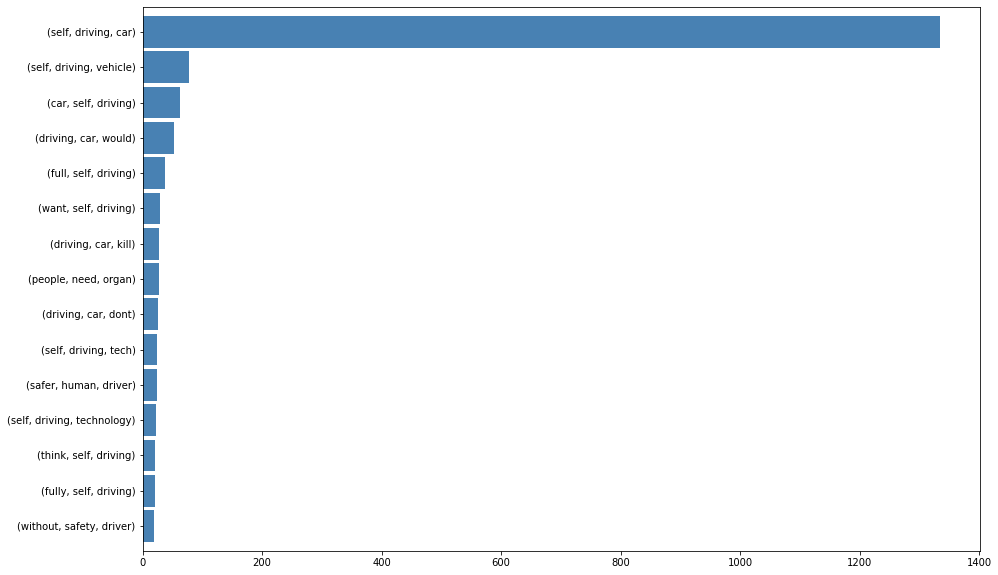

In [12]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


ADDITIONAL_STOPWORDS = ['unamed' , 'gon', 'na', 'amp', 'driverless car', 'driverless vehicle', 'self driving car','self driving vehicle', 
                'self drive vehicle', 'self drive car', 'autonomous car' , 'drive self car']
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/leonardojacuinde/Desktop/NewDataNoLinksAndFloatsAndEmptyCellsAndNumbersAndPuctuationAndLowerCaseNEW.csv')
df.head()
def basic_clean(text):
    """
A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
words = basic_clean(''.join(str(df['comment_body'].tolist())))
#print(words)
#pd.Series(nltk.ngrams(words, 3)).value_counts())[:50]

#bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
#bigrams_series.sort_values().plot.barh(color=(72/255, 129/255, 179/255, 1), width=.9, figsize=(15, 10))
#print(bigrams_series)

sia = SIA()
results = [] 

trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]
trigrams_series.sort_values().plot.barh(color=(72/255, 129/255, 179/255, 1), width=.9, figsize=(15, 10))
print(trigrams_series)